In [1]:
import matplotlib.pyplot as plt
import torch

# 平均汇聚层与注意力汇聚层的区别与联系

## 1. 平均汇聚层

### 定义
- 平均汇聚层（Average Pooling Layer）是一种**简单的汇聚操作**，对输入的所有元素进行**简单平均**。
- 每个输入的权重都是**相等的**。

### 公式
$$
\text{输出} = \frac{1}{n} \sum_{i=1}^n x_i
$$

### 特性
- 所有输入的权重相等（权重为 $\frac{1}{n}$）。
- 不区分输入的重要性。
- 应用于降维或特征的粗粒度提取。

### 示例
输入为 $[1, 2, 3]$：
$$
\text{输出} = \frac{1}{3}(1 + 2 + 3) = 2
$$
权重为 $\frac{1}{3}$，每个输入的贡献相同。

---

## 2. 注意力汇聚层

### 定义
- 注意力汇聚层（Attention Pooling Layer）是一种**动态加权平均操作**。
- 根据**查询（Query）**和**键（Key）**的关系计算权重，进而对输入进行加权平均。

### 公式
对于输入 $x_1, x_2, \dots, x_n$ 及其权重 $w_1, w_2, \dots, w_n$，其输出为：
$$
\text{输出} = \sum_{i=1}^n w_i x_i
$$
其中，权重 $w_i$ 是根据查询和键之间的相似度动态计算的，且满足：
$$
\sum_{i=1}^n w_i = 1
$$

### 权重计算步骤
1. **相似度计算**：通过查询向量 $q$ 和键向量 $k_i$ 的相似度函数（如点积、余弦相似度）计算：
   $$
   \text{相似度}(q, k_i)
   $$
2. **归一化**：使用 Softmax 函数将相似度转化为权重：
   $$
   w_i = \frac{\exp(\text{相似度}(q, k_i))}{\sum_{j=1}^n \exp(\text{相似度}(q, k_j))}
   $$
3. **加权聚合**：根据权重 $w_i$ 对输入进行加权平均。

### 示例
输入为 $[1, 2, 3]$，查询向量 $q$ 和键向量 $k = [k_1, k_2, k_3]$ 计算得权重为 $w = [0.1, 0.3, 0.6]$：
$$
\text{输出} = 0.1 \cdot 1 + 0.3 \cdot 2 + 0.6 \cdot 3 = 2.5
$$
权重反映了查询向量对每个输入的重要性。

---

## 3. 联系与区别

### 联系
- 两者的输出形式都是**加权平均值**。
- **平均汇聚层**是注意力汇聚层的一个特例：当所有权重相等时，注意力汇聚层退化为平均汇聚层。

### 区别
| 特性             | 平均汇聚层                     | 注意力汇聚层                     |
|------------------|--------------------------------|----------------------------------|
| **权重计算方式** | 固定相等权重                   | 动态计算，依赖查询和键的相似度   |
| **灵活性**       | 无法区分输入的重要性           | 根据输入的重要性动态调整权重     |
| **应用场景**     | 简单降维或粗粒度特征提取       | 注意力机制、神经网络的动态建模   |

---

## 4. 总结
- **平均汇聚层**是一种简单的加权平均，所有输入权重相等。
- **注意力汇聚层**是加权平均的广义形式，权重由查询和键的关系动态计算。
- 注意力汇聚层能更灵活地关注重要输入，是现代深度学习的重要机制之一。

In [8]:
# 实现注意力的可视化
# 输入matrices的形状是（要显示的行数，要显示的列数，查询的数目，键的数目）
# 每个矩阵（查询数目 × 键数目）对应一个子图。

def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5), cmap='Reds'):
    """显示矩阵热图"""
    # 使用 Matplotlib 的 rcParams 来设置 SVG 格式
    plt.rcParams['figure.dpi'] = 120  # 调整分辨率
    plt.rcParams['savefig.format'] = 'svg'  # 设置保存格式为 SVG

    # 获取矩阵的行列数
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]

    # 绘图相关参数讲解
    # num_rows, num_cols 子图网格的行列数
    # figsize 整个图像的宽度和高度
    # sharex=True, sharey=True 所有子图共享相同的x轴刻度
    # squeeze=False 无论子图网格的形状如何，axes 始终是一个二维数组。
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize, sharex=True, sharey=True, squeeze=False)
    # axes 的形状：(num_rows, num_cols)

    # 遍历每一行的子图和对应的矩阵
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        # 遍历每一列的子图和对应的矩阵
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])

    # 添加颜色条
    fig.colorbar(pcm, ax=axes, shrink=0.6)
    plt.show()

1 1


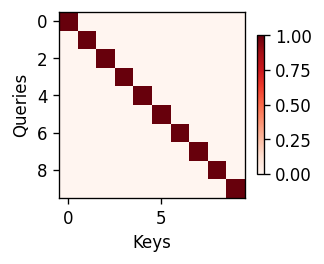

In [9]:
# torch.eye(10)创建一个 10x10 的对角矩阵
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')